In [1]:

from dotenv import load_dotenv
load_dotenv()
import os
import sys
sys.path.append(
    os.environ.get('WORK_DIR')) #type: ignore
sys.path.append(
    os.environ.get('DBASE_DIR')) #type: ignore
from dbase.DataAPI.ThetaData import * #type: ignore
from dbase.database.SQLHelpers import * #type: ignore
import pandas as pd
from EventDriven.data import HistoricTradeDataHandler
from EventDriven.event import *
from queue import Queue
from trade.backtester_.backtester_ import PTDataset, PTBacktester
import pandas_ta as ta
from trade.assets.Stock import Stock
from trade.backtester_.utils.WalkForwardUtils import prev_monday 
from trade.backtester_.strats import BBandsTrend2
from trade.backtester_.strats import MAStrat
import yfinance as yf
from datetime import datetime
from EventDriven.backtest import OptionSignalBacktest
from copy import deepcopy
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2


Console Logging & File Logging Can be configured using STREAM_LOG_LEVEL and FILE_LOG_LEVEL in environment variables.
Propagate to root logger can be set using PROPAGATE_TO_ROOT_LOGGER in environment variables.
Example:
STREAM_LOG_LEVEL = 'DEBUG'
FILE_LOG_LEVEL = 'INFO'
PROPAGATE_TO_ROOT_LOGGER = 'False'

2025-02-26 18:42:50 trade.helpers.Logging INFO: Logging Root Directory: /Users/chiemelienwanisobi/cloned_repos/QuantTools/logs
Using Proxy URL: http://18.232.166.224:5500/thetadata


In [46]:
import json
key = 10
with open(f'/Users/chiemelienwanisobi/cloned_repos/QuantTools/EventDriven/input/profitable_weights_{key}.json', 'r') as f:
    weights = json.load(f)
ttrades__ = pd.read_csv(f'/Users/chiemelienwanisobi/cloned_repos/QuantTools/EventDriven/input/profitable_trades_{key}.csv').iloc[:, 1:]


In [47]:
trades_ = ttrades__.copy()
trades_

,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,PnL,ReturnPct,EntryTime,ExitTime,Duration,Ticker
0,53.0,506.0,514.0,93.606479,87.160255,-341.649859,-0.068865,2021-07-02,2021-07-15,13 days,AMD
1,361.0,506.0,514.0,20.511791,18.903036,-580.760669,-0.078431,2021-07-02,2021-07-15,13 days,NVDA
2,17.0,508.0,649.0,280.377894,307.989990,469.405638,0.098482,2021-07-07,2022-01-26,203 days,MSFT
3,23.0,508.0,681.0,144.042383,151.449997,170.375115,0.051427,2021-07-07,2022-03-14,250 days,AAPL
4,357.0,515.0,649.0,19.097107,23.240000,1479.012661,0.216938,2021-07-16,2022-01-26,194 days,NVDA
5,8.0,522.0,526.0,140.501040,134.702360,-46.389441,-0.041271,2021-07-27,2021-08-02,6 days,GOOG
6,17.0,523.0,525.0,122.988958,121.121089,-31.753765,-0.015187,2021-07-28,2021-07-30,2 days,SBUX
7,5.0,523.0,578.0,42.498223,41.560001,-4.691110,-0.022077,2021-07-28,2021-10-14,78 days,PFE
8,42.0,527.0,560.0,108.528527,99.858878,-364.125232,-0.079884,2021-08-03,2021-09-20,48 days,AMD
9,1.0,529.0,553.0,174.458481,168.425693,-6.032788,-0.034580,2021-08-05,2021-09-09,35 days,JNJ


In [48]:
symbol_list = trades_.Ticker.unique()
untraded_symbols = [s for s in weights.keys() if s not in trades_.Ticker.unique()]
for s in untraded_symbols:
    weights.pop(s)
weights

{'TSLA': 0.12061721363233953,
 'NVDA': 0.15313513249318636,
 'AMD': 0.10269371236893544,
 'MU': 0.0849298451438441,
 'MSFT': 0.0989312244756594,
 'AAPL': 0.06974605097720511,
 'AMZN': 0.05294669308281385,
 'QCOM': 0.02695988293100484,
 'BAC': 0.03940079953741621,
 'AVGO': 0.031233045315583213,
 'SBUX': 0.04417059280393447,
 'HD': 0.03084332760268152,
 'WMT': 0.0269921214867363,
 'GOOG': 0.02354465191963844,
 'INTC': 0.0032246762824489463,
 'PFE': 0.005000000000000001,
 'JNJ': 0.005000000000000001}

In [5]:

from EventDriven.riskmanager import RiskManager, close_cache, spot_cache, chain_cache, oi_cache, LOOKBACKS, order_cache
from pandas.tseries.offsets import BDay

rm = RiskManager(None, None, 1000000)
rm.OrderPicker.liquidity_threshold = 100
rm.OrderPicker.lookback = 10
rm.OrderPicker.data_availability_threshold = 0.5
date, tick = '2023-07-05', 'AVGO'
date, tick = '2023-12-01', 'BAC'
start = (pd.to_datetime(date) - BDay(30)).strftime('%Y-%m-%d')
right = 'C'
order_settings = {'type': 'naked',
 'specifics': [{'direction': 'long',
   'rel_strike': .800,
   'dte': 365,
   'moneyness_width': 0.35},
   {'direction': 'short',
  'rel_strike': .60,
  'dte': 365,
  'moneyness_width': 0.35}
],
 'name': 'vertical_spread'}



order =  rm.OrderPicker.get_order(tick, date, right, 2, order_settings)
order

Saving to cache from db
Updating db rates data


{'result': 'SUCCESSFUL',
 'data': {'long': ['BAC20250117C35'],
  'short': ['BAC20250117C55'],
  'trade_id': '&L:BAC20250117C35&S:BAC20250117C55',
  'close': 1.9900000000000002}}

In [49]:
#Backtest class 
## Find a way to not always reinitialize the backtest class, when want to redo
evb_backtest = OptionSignalBacktest(trades_, initial_capital=20_000)

In [50]:
evb_backtest.portfolio.initial_capital

20000

In [51]:
w_map = {x: w  * 0.75 for x, w in weights.items()}
evb_backtest.portfolio.weight_map = w_map
evb_backtest.portfolio.weight_map
evb_backtest.portfolio.risk_manager.OrderPicker.liquidity_threshold = 100
evb_backtest.portfolio.risk_manager.OrderPicker.lookback = 10
evb_backtest.portfolio.risk_manager.OrderPicker.data_availability_threshold = 0.5
evb_backtest.portfolio.order_settings = {'type': 'naked',
 'specifics': [{'direction': 'long',
   'rel_strike': .800,
   'dte': 365,
   'moneyness_width': 0.35},
   {'direction': 'short',
  'rel_strike': .60,
  'dte': 365,
  'moneyness_width': 0.35}
],
 'name': 'vertical_spread'}

evb_backtest.portfolio.max_contract_price = 2
evb_backtest.executor.commission_rate = 0.65/100
evb_backtest.executor.commission_rate
evb_backtest.portfolio.allocated_cash_map
evb_backtest.executor.max_slippage_pct = 0.1

In [52]:
signals = evb_backtest.bars.signal_df
signals

,Date,AMD,NVDA,MSFT,AAPL,GOOG,SBUX,PFE,JNJ,WMT,AMZN,TSLA,BAC,HD,AVGO,QCOM,MU,INTC
0,2021-07-02,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2021-07-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2021-07-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2021-07-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2021-07-06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,2022-06-09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
343,2022-06-10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
344,2022-06-11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
345,2022-06-12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [53]:
signals_df = deepcopy(signals).set_index('Date')
signals_df[signals_df!=-1].sum().sum()

34.0

In [54]:
import cProfile
import pstats
import io

profiler = cProfile.Profile()
profiler.enable()
#run backtest

evb_backtest.run()
profiler.disable()
stream = io.StringIO()
stats = pstats.Stats(profiler, stream=stream).sort_stats('cumulative')

        Date  AMD  NVDA  MSFT  AAPL  GOOG  SBUX  PFE  JNJ  WMT  AMZN  TSLA  \
0 2021-07-02    1     1     0     0     0     0    0    0    0     0     0   

   BAC  HD  AVGO  QCOM  MU  INTC  
0    0   0     0     0   0     0  
Processing event: MARKET
Processing event: SIGNAL
Processing event: SIGNAL
Processing event: ORDER
Processing event: FILL
Event queue is empty, processed 5 event(s)
        Date  AMD  NVDA  MSFT  AAPL  GOOG  SBUX  PFE  JNJ  WMT  AMZN  TSLA  \
1 2021-07-03    0     0     0     0     0     0    0    0    0     0     0   

   BAC  HD  AVGO  QCOM  MU  INTC  
1    0   0     0     0   0     0  
Processing event: MARKET
Event queue is empty, processed 1 event(s)
        Date  AMD  NVDA  MSFT  AAPL  GOOG  SBUX  PFE  JNJ  WMT  AMZN  TSLA  \
2 2021-07-04    0     0     0     0     0     0    0    0    0     0     0   

   BAC  HD  AVGO  QCOM  MU  INTC  
2    0   0     0     0   0     0  
Processing event: MARKET
Event queue is empty, processed 1 event(s)
        Date  AMD 

In [55]:
pd.set_option('display.max_columns', 100)

In [56]:
evb_backtest.portfolio.plot_portfolio()

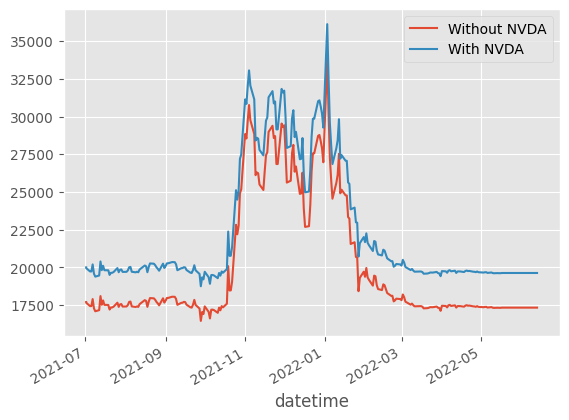

In [57]:
eq = evb_backtest.portfolio._equity.copy()
(eq['Total'] - eq['NVDA']).plot()
eq['Total'].plot(legend = 'With NVDA')
plt.legend(['Without NVDA', 'With NVDA'])
plt.show()


In [58]:
evb_backtest.portfolio.aggregate()

Start                                                    2021-07-02 00:00:00
End                                                      2022-06-13 00:00:00
Duration                                                   346 days 00:00:00
Exposure Time [%]                                                      99.19
Equity Final [$]                                                    19629.32
Equity Peak [$]                                                 36129.158243
Return [%]                                                           -1.8534
Buy & Hold Return [%]                                             -13.360887
CAGR [%]                                                           -1.954176
Volatility Ann. [%]                                                55.373483
Sharpe Ratio                                                        0.230351
Sortino Ratio                                                       0.323548
Skew                                                                1.886925

In [59]:
evb_backtest.portfolio.get_trades()

,Ticker,PnL,ReturnPct,EntryPrice,EntryCommission,EntrySlippage,EntryMarketValue,TotalEntryCost,AuxilaryEntryCost,ExitPrice,ExitCommission,ExitSlippage,ExitMarketValue,TotalExitCost,AuxilaryExitCost,Quantity,EntryTime,ExitTime,Duration,Positions
0,AMD,-248.423438,-19.960430,207.429934,3.90,40.679607,1240.679607,1289.159213,-48.479607,166.026028,3.90,40.056169,1000.056169,1040.112338,-40.056169,6,2021-07-02,2021-07-15,13,&L:AMD20220617C120&S:AMD20220617C130
1,MSFT,-359.740472,-28.096519,182.910546,4.55,-36.676178,1275.823822,1248.247644,27.576178,131.519050,4.55,-37.316650,925.183350,887.866700,37.316650,7,2021-07-07,2022-01-26,203,&L:MSFT20220617C300&S:MSFT20220617C305
2,AAPL,-573.234699,-67.492234,212.333577,2.60,58.734308,846.734308,910.668617,-63.934308,69.024902,2.60,14.699609,278.699609,293.399218,-14.699609,4,2021-07-07,2022-03-14,250,&L:AAPL20220617C195&S:AAPL20220617C230
3,SBUX,-34.553614,-5.621871,204.876107,1.95,20.178322,612.678322,636.756645,-24.078322,193.358236,1.95,-25.475292,582.024708,556.549417,25.475292,3,2021-07-28,2021-07-30,2,&L:SBUX20220617C125&S:SBUX20220617C130
4,PFE,NaN,NaN,NaN,0.00,-0.000000,0.000000,NaN,NaN,NaN,0.00,0.000000,0.000000,NaN,NaN,0,2021-07-28,2021-10-14,78,&L:PFE20220617C45&S:PFE20220617C55
5,JNJ,NaN,NaN,NaN,0.00,0.000000,0.000000,NaN,NaN,NaN,0.00,-0.000000,0.000000,NaN,NaN,0,2021-08-05,2021-09-09,35,&L:JNJ20220617C180&S:JNJ20220617C185
6,WMT,-173.327021,-44.392374,195.221618,1.30,31.143236,389.143236,422.886473,-33.743236,108.558108,1.30,-20.583784,218.416216,197.832431,20.583784,2,2021-08-12,2021-09-13,32,&L:WMT20220617C175&S:WMT20220617C190
7,TSLA,1795.911050,124.359261,180.516416,5.20,-41.068673,1438.931327,1408.262654,30.668673,405.005297,5.20,85.242377,3245.242377,3330.484754,-85.242377,8,2021-10-18,2022-01-28,102,&L:TSLA20220916C1600&S:TSLA20220916C1675
8,WMT,-20.412338,-9.370502,217.836118,0.65,18.186118,217.186118,236.672236,-19.486118,197.423780,0.65,3.573780,198.073780,201.647560,-3.573780,1,2021-10-20,2021-11-17,28,&L:WMT20230120C180&S:WMT20230120C210
9,AMD,239.195563,21.995238,181.247994,3.90,-71.412036,1083.587964,1019.975928,63.612036,221.113921,3.90,100.583527,1330.583527,1431.167055,-100.583527,6,2021-10-22,2022-01-24,94,&L:AMD20220916C150&S:AMD20220916C160


## Extend for  get_port_stats
- Buy & Hold
- Dates
- Trades
- _strategy in Aggregate
- The function

In [60]:
evb_backtest.trades.to_csv(f'/Users/chiemelienwanisobi/cloned_repos/QuantTools/EventDriven/output/profitable_trades_options_{key}.csv')